# Exploratory Data Analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from scipy import  stats
from scipy.stats import norm
import tensorflow_decision_forests as tfdf

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


## 1. Read the Data

In [2]:
# Read Train data
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
# Print out all columns
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# Print out "SalePrice" numeric info
train_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
# Print out dtypes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 2. Check Data Distribution

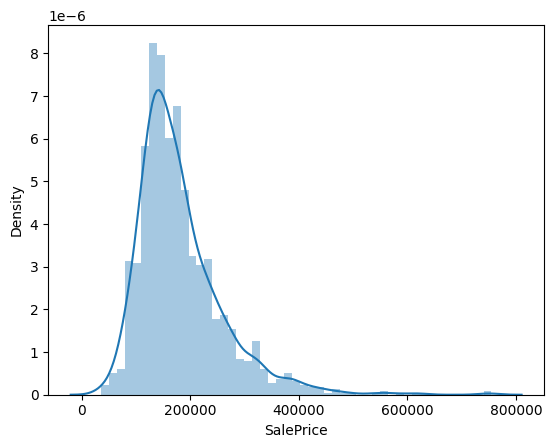

In [7]:
sns.distplot(train_df['SalePrice']);

In [8]:
# Print out skewness and Kurtosis
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


## 3. Check the relationship between variable

**Relationship between Numerical Variable**

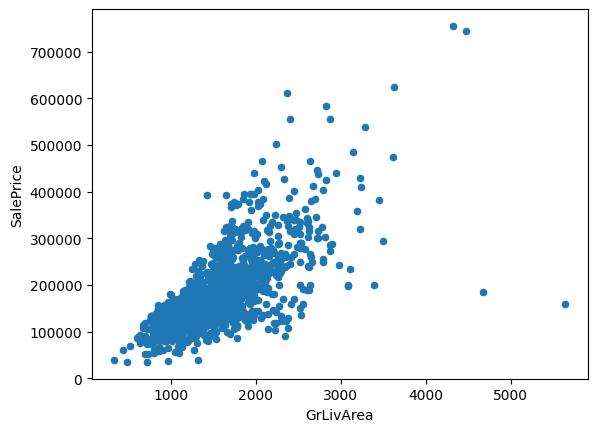

In [9]:
# Using scatter plot to see relationship between SalePrice and GrLivArea
data = pd.concat([train_df['SalePrice'], train_df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice');

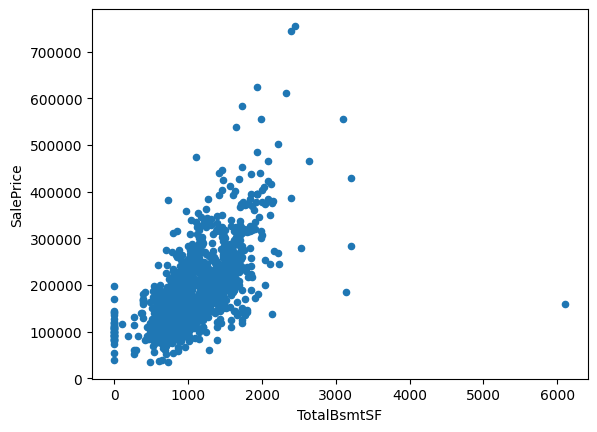

In [10]:
# Using scatter plot to see relationship between SalePrice and TotalBsmtSF
data = pd.concat([train_df['SalePrice'], train_df['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice');

**Relationship Between Categorical Variable**

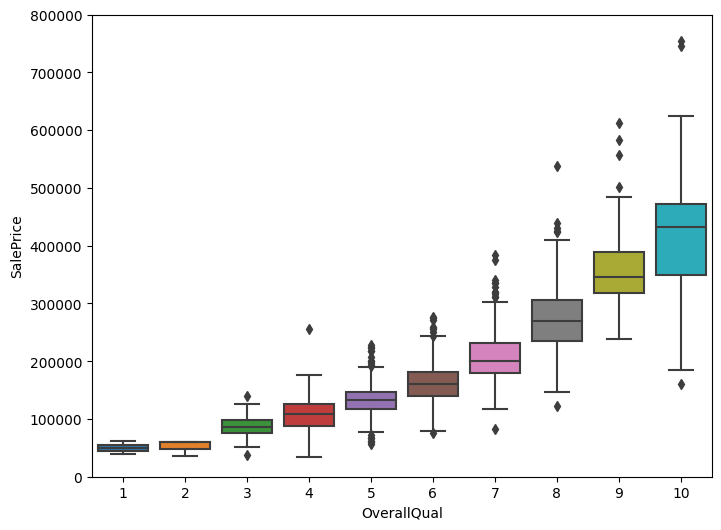

In [11]:
# Using Boxplot to see correlation for Categorical variable like OverallQuall and SalePrice
data = pd.concat([train_df["SalePrice"], train_df["OverallQual"]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(data=data, x="OverallQual", y="SalePrice")
fig.axis(ymin=0, ymax=800000);

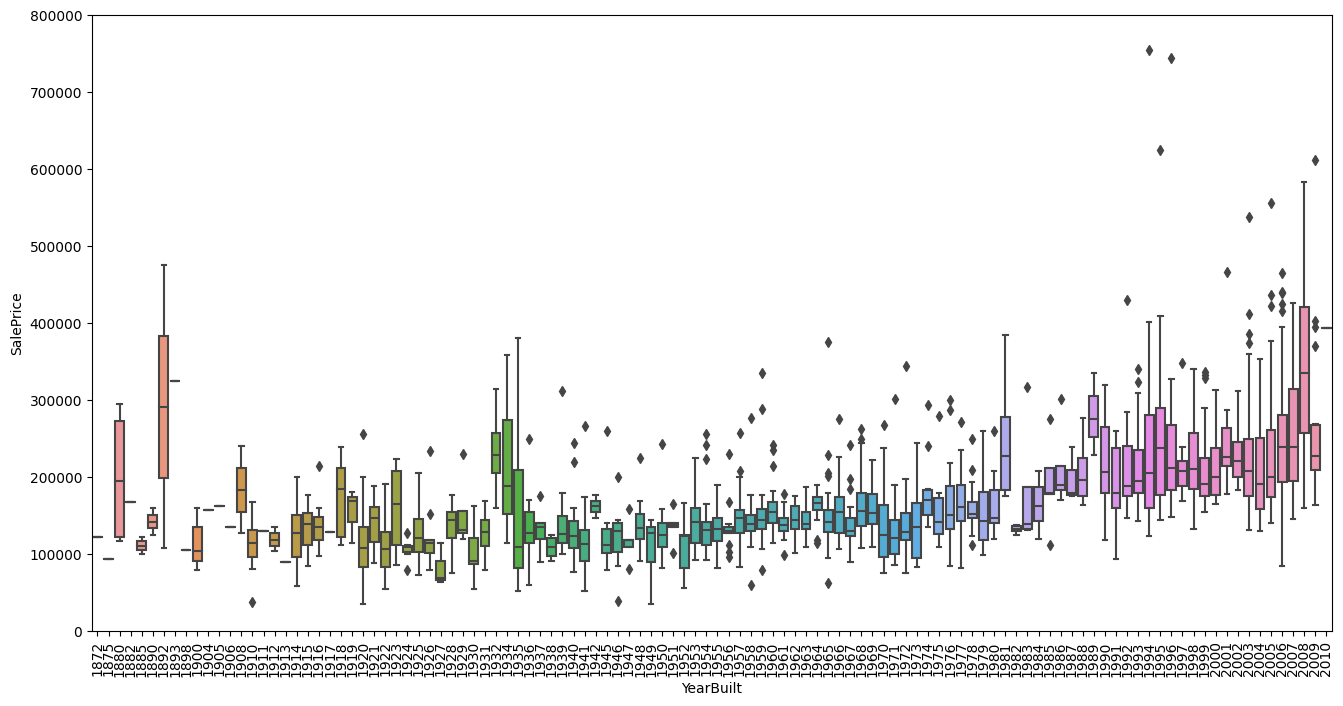

In [12]:
# Using Boxplot to see correlation for Categorical variable like YearBuilt and SalePrice
data = pd.concat([train_df['SalePrice'], train_df['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

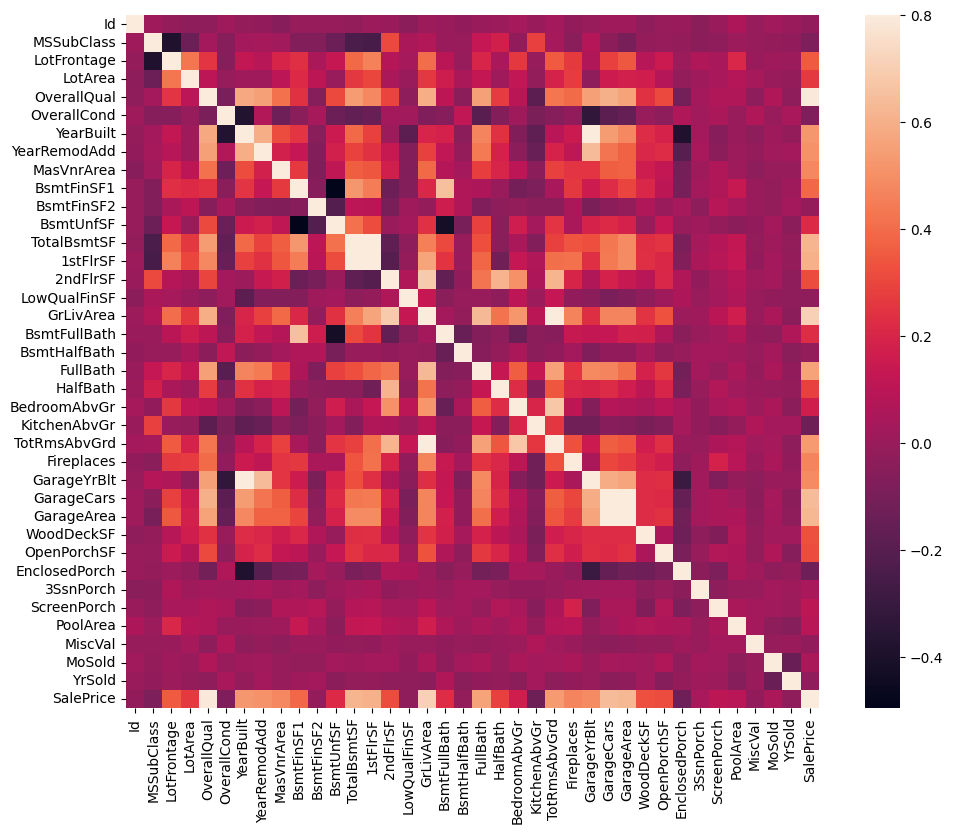

In [13]:
# Using Heatmap to see the correlation for all numerical variable
corrmat= train_df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True);

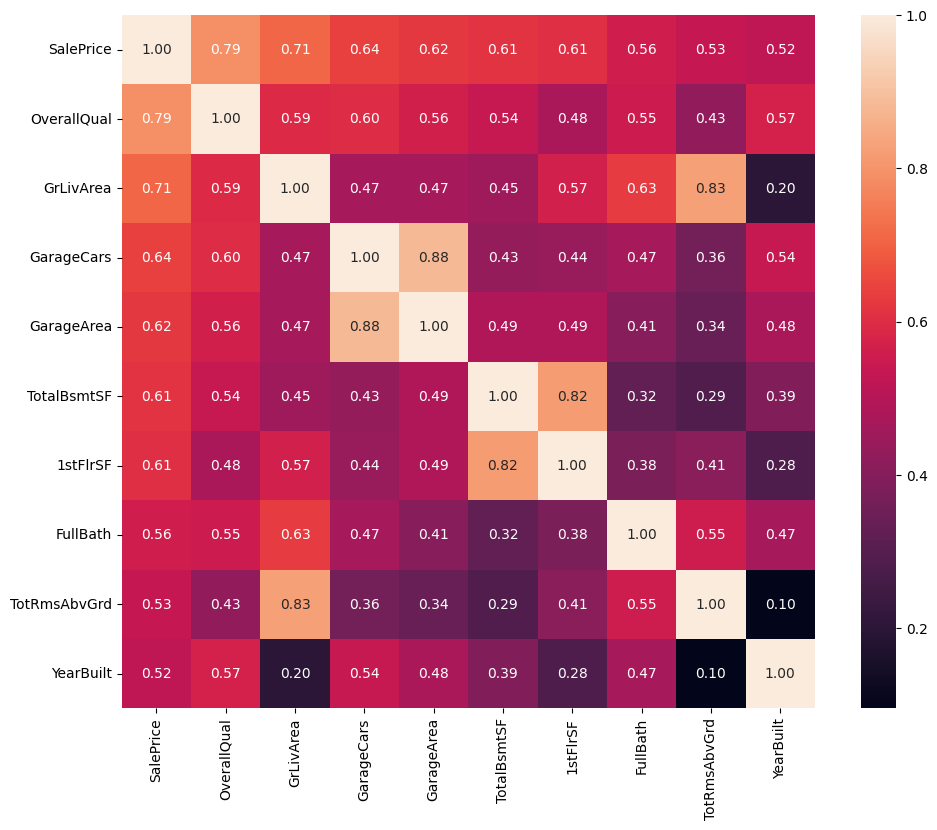

In [14]:
# Take only top 10 correlation for SalePrice and numerical variable 
corrmat_saleprice = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[corrmat_saleprice].values.T)
f, ax = plt.subplots(figsize=(12,9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=corrmat_saleprice.values, xticklabels=corrmat_saleprice.values)

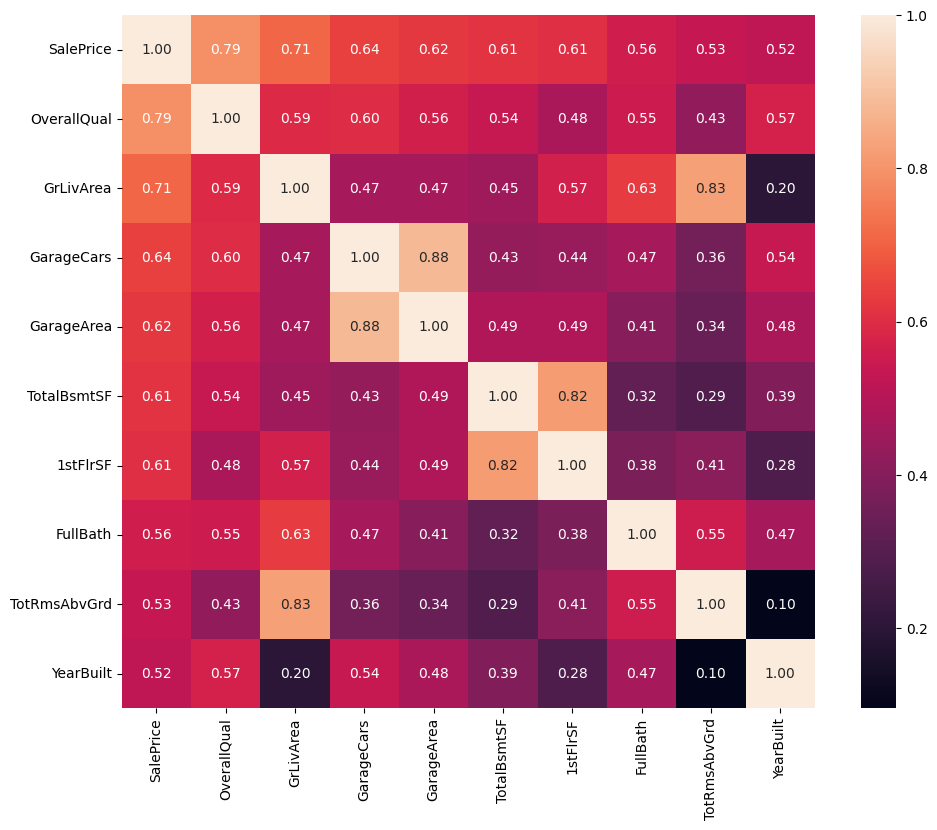

In [15]:
corrmat_saleprice = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[corrmat_saleprice].values.T)
f, ax = plt.subplots(figsize=(12,9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=corrmat_saleprice.values, xticklabels=corrmat_saleprice.values)

In [16]:
# sns.set()
# cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
# pp = sns.pairplot(train_df[cols], height = 2)
# plt.show();

## 4. Do some Cleaning 

In [17]:
# Print out all variable with missing value 
train_df[train_df.columns[train_df.isna().any()].tolist()].isna().sum().sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [18]:
# Take all variable name that have missing value except for "Electrical" 
missing_value_columns = train_df.columns[train_df.isna().any()].tolist()
missing_value_columns.remove('Electrical')
missing_value_columns

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [19]:
# Drop all column that have missing value and lastly drop missing value row in Electrical
train_df = train_df.drop(missing_value_columns, axis=1)
train_df = train_df.dropna()

# Double check for missing value
train_df.isna().sum().max()

0

## 5. Standardize the numerical Value

In [20]:
# Take all SalePrice value and Standardize the value using StandardScaler
saleprice_value = train_df["SalePrice"].values
saleprice_reshape = saleprice_value.reshape(-1, 1)
saleprice_scaled = StandardScaler().fit_transform(saleprice_reshape)

# Transform back again to pandas Series to take low_range and high_range
saleprice_scaled_series = pd.Series(saleprice_scaled.flatten())

# Get lowest and highest values
low_range = saleprice_scaled_series.nsmallest(10).values.reshape(-1,1)
print("Outer Range (low) of the distribution\n", low_range)

high_range = saleprice_scaled_series.nlargest(10).values.reshape(-1,1)
print("\nOuter Range (high) of the distribution\n", high_range)

Outer Range (low) of the distribution
 [[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

Outer Range (high) of the distribution
 [[7.22629831]
 [7.10041987]
 [5.58987866]
 [5.42191907]
 [5.06034585]
 [4.728631  ]
 [4.70872962]
 [4.49473628]
 [4.0395221 ]
 [3.82758058]]


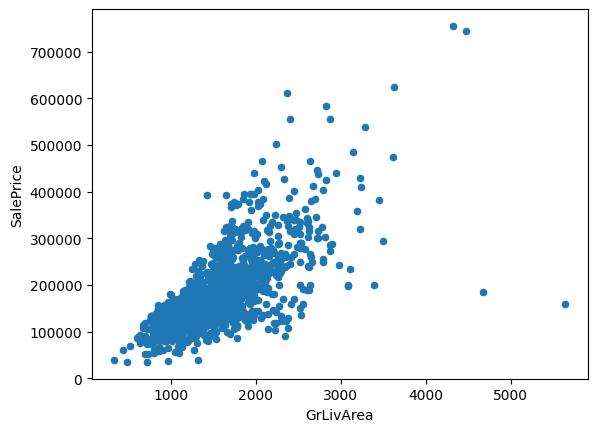

In [21]:
# Bivariate Analysis SalePrice | GrLivArea
data = pd.concat([train_df['SalePrice'], train_df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice');

In [22]:
# Preparing for the deleting outlier
train_df.sort_values(by='GrLivArea', ascending=False)[:10][["Id","GrLivArea","SalePrice"]]

,Id,GrLivArea,SalePrice
1298,1299,5642,160000
523,524,4676,184750
1182,1183,4476,745000
691,692,4316,755000
1169,1170,3627,625000
185,186,3608,475000
304,305,3493,295000
1268,1269,3447,381000
635,636,3395,200000
769,770,3279,538000


In [23]:
# Drop the outlier
train_df = train_df.drop(train_df[train_df["Id"] == 1299].index)
train_df = train_df.drop(train_df[train_df["Id"] == 524].index)

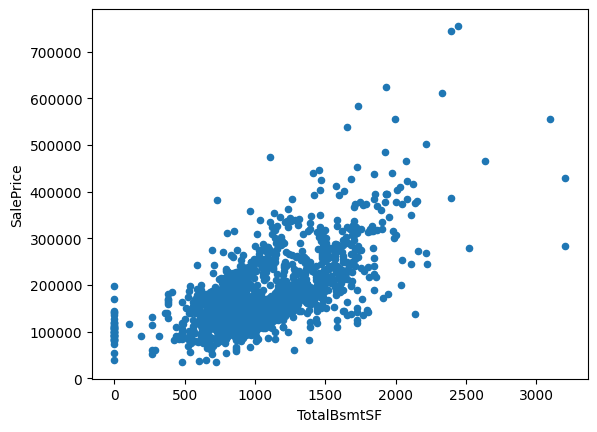

In [24]:
# Bivariate Analysis SalePrice | TotalBsmtSF
data = pd.concat([train_df['SalePrice'], train_df['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice');

### Transfrom SalePrice value

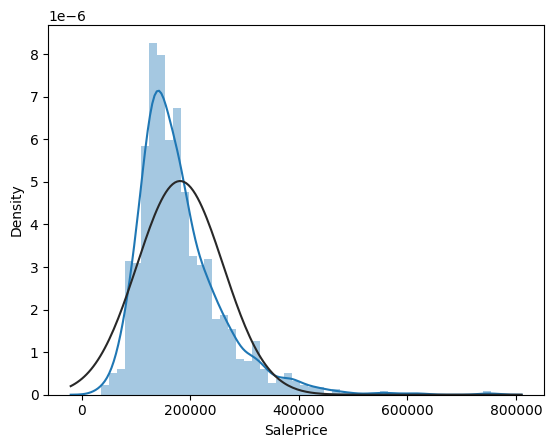

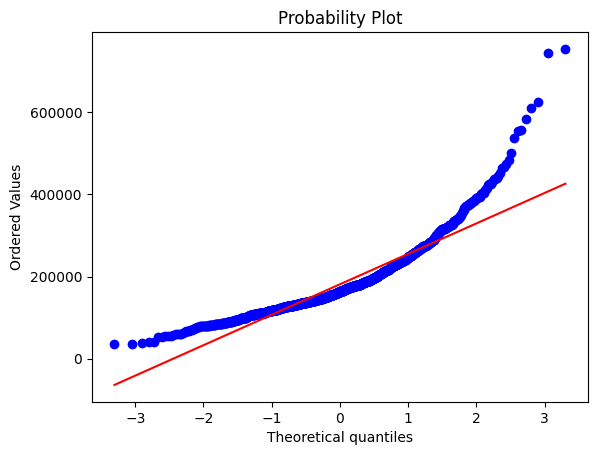

In [25]:
sns.distplot(train_df["SalePrice"], fit=norm);
fit = plt.figure()
res = stats.probplot(train_df["SalePrice"], plot=plt);

In [26]:
train_df["SalePrice"] = np.log(train_df["SalePrice"])

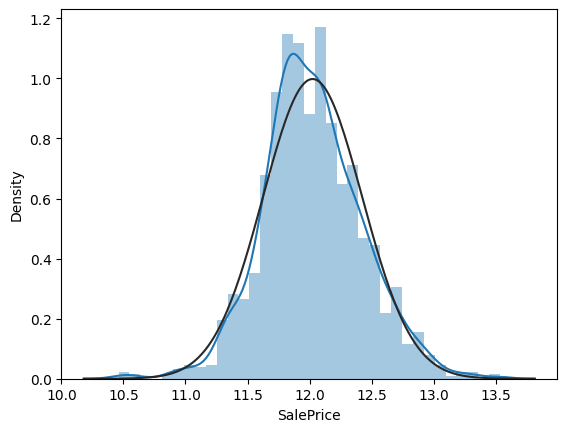

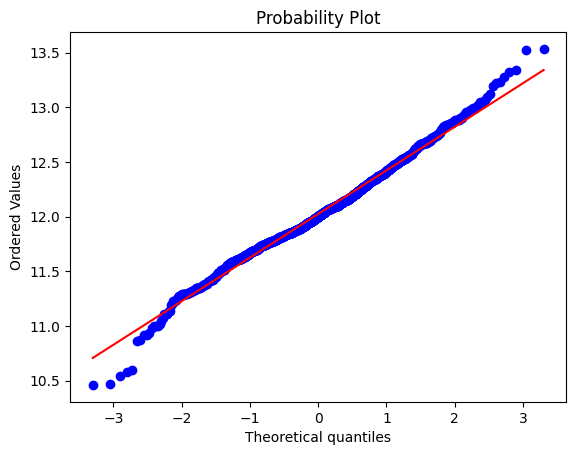

In [27]:
sns.distplot(train_df["SalePrice"], fit=norm);
fit = plt.figure()
res = stats.probplot(train_df["SalePrice"], plot=plt);

### Transformg GrLivArea

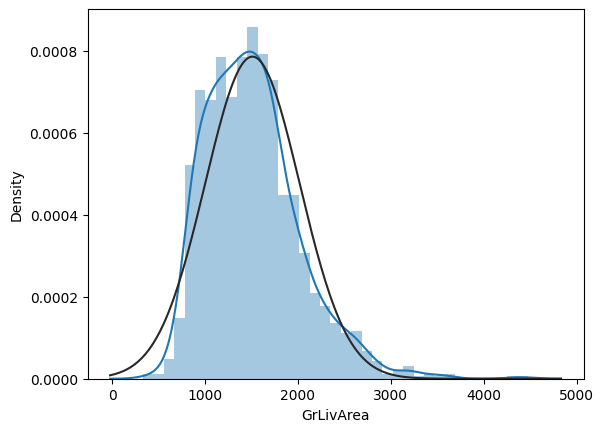

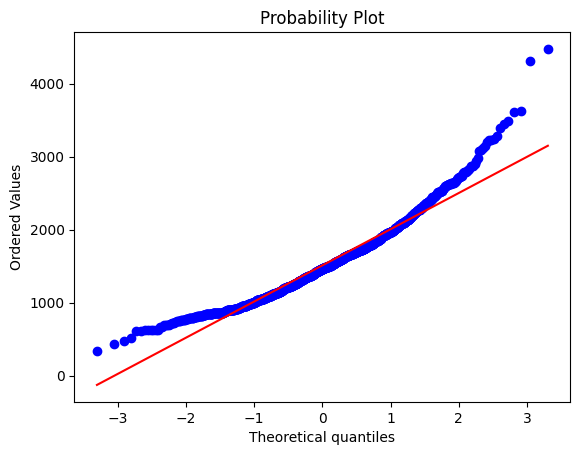

In [28]:
sns.distplot(train_df["GrLivArea"], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df["GrLivArea"], plot=plt);

In [29]:
train_df["GrLivArea"] = np.log(train_df["GrLivArea"])

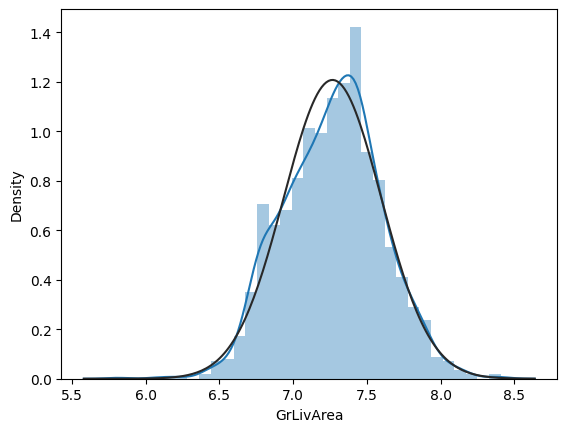

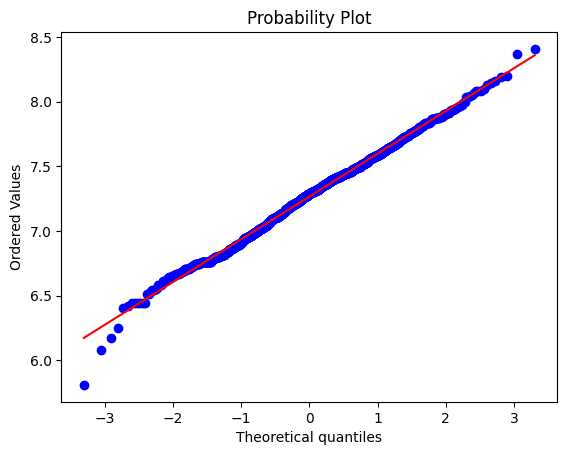

In [30]:
sns.distplot(train_df["GrLivArea"], fit=norm);
plt.figure()
res = stats.probplot(train_df["GrLivArea"], plot=plt);

### Transform TotalBsmtSF

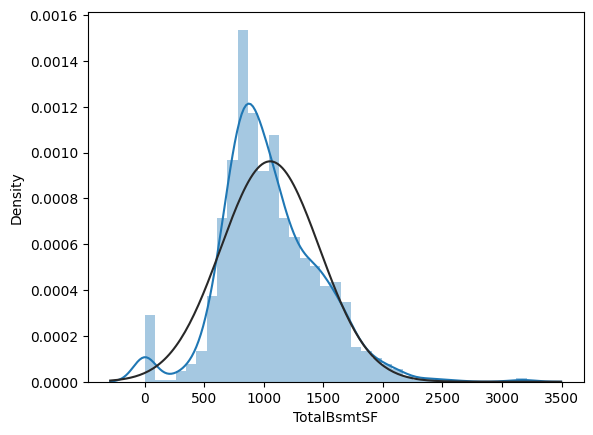

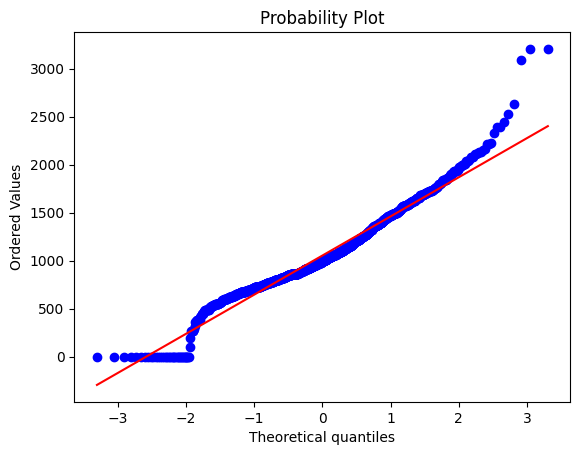

In [31]:
sns.distplot(train_df["TotalBsmtSF"], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df["TotalBsmtSF"], plot=plt);

In [32]:
# Create new column to store if the house has basement or not
train_df["HasBsmt"] = (train_df["TotalBsmtSF"] > 0).astype(int)
test_df["HasBsmt"]  = (test_df["TotalBsmtSF"]> 0).astype(int)

# Transform data only if the house has basement
train_df.loc[train_df["HasBsmt"]==1, "TotalBsmtSF"] = np.log(train_df["TotalBsmtSF"])
test_df.loc[test_df["HasBsmt"]==1, "TotalBsmtSF"] = np.log(test_df["TotalBsmtSF"])

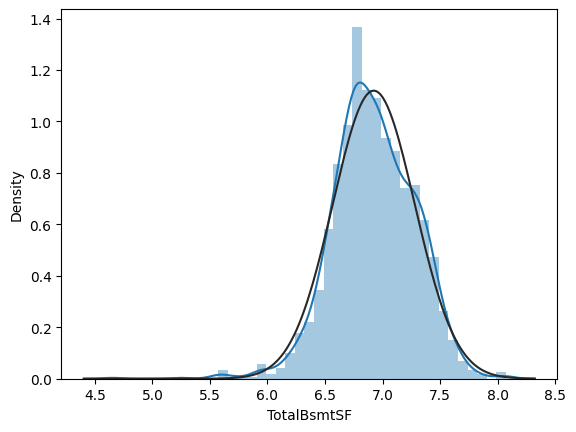

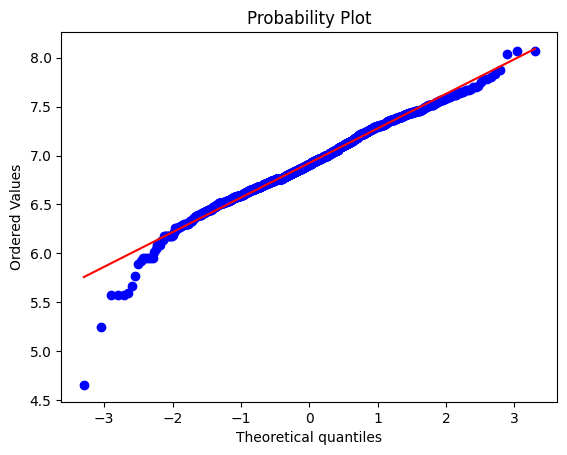

In [33]:
# Plot the histogram and normal probability
house_with_basement = train_df[train_df["TotalBsmtSF"]>0]["TotalBsmtSF"]
sns.distplot(house_with_basement, fit=norm);
fig = plt.figure()
stats.probplot(house_with_basement, plot=plt);

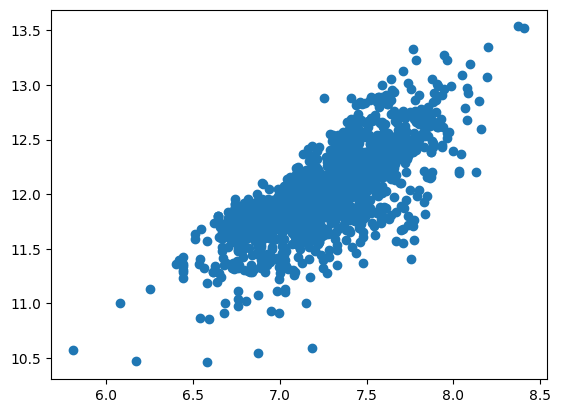

In [34]:
plt.scatter(train_df["GrLivArea"], train_df["SalePrice"]);

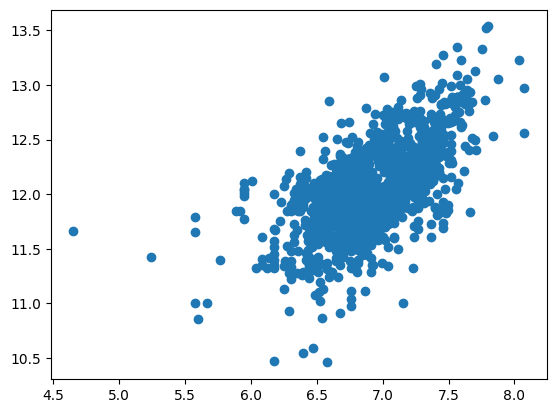

In [35]:
plt.scatter(
    train_df[train_df["TotalBsmtSF"]>0]["TotalBsmtSF"], 
    train_df[train_df["TotalBsmtSF"]>0]["SalePrice"]
);

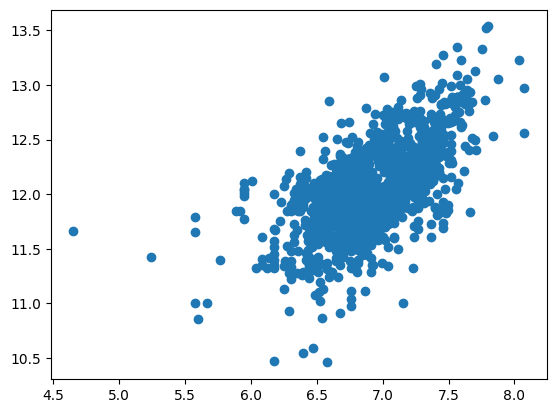

In [36]:
plt.scatter(
    train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF'], 
    train_df[train_df['TotalBsmtSF']>0]['SalePrice']
);

# Start Creating Model

## 1. Convert into Tensor Flow Dataset

In [37]:
train_df = train_df.drop("Id", axis=1)
test_df = test_df.drop("Id", axis=1)

test_df = test_df.drop(missing_value_columns, axis=1)

In [38]:
print(len(train_df.columns.to_list()))

63


In [39]:
print(len(test_df.columns.to_list()))

62


In [40]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="SalePrice", task=tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, task=tfdf.keras.Task.REGRESSION)

In [41]:
tfdf_model = tfdf.keras.GradientBoostedTreesModel(task=tfdf.keras.Task.REGRESSION)

Use /tmp/tmpyi8pnt8k as temporary training directory


In [42]:
tfdf_model.fit(train_ds)

Reading training dataset...
Training dataset read in 0:00:06.650248. Found 1457 examples.
Training model...
Model trained in 0:00:03.171552
Compiling model...
Model compiled.


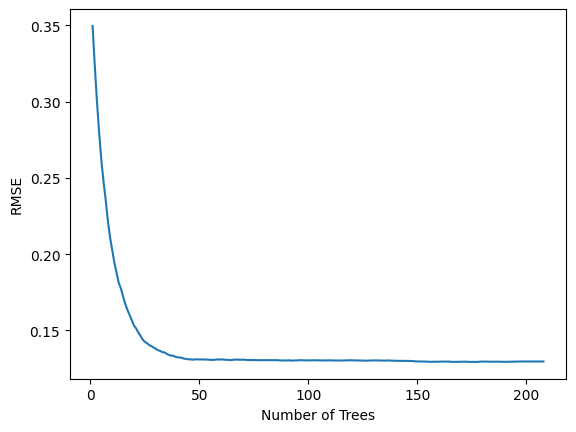

In [43]:
logs = tfdf_model.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs],[log.evaluation.rmse for log in logs])
plt.xlabel("Number of Trees")
plt.ylabel("RMSE")
plt.show()

In [44]:
tfdf.model_plotter.plot_model_in_colab(tfdf_model, tree_idx=0, max_depth=4)

In [45]:
y_pred = tfdf_model.predict(test_ds)

predicts = np.exp(y_pred)

2/2 [==============================] - 1s 19ms/step


In [46]:
sample_submission_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")
sample_submission_df["SalePrice"] = predicts
sample_submission_df.to_csv("/kaggle/working/submission.csv", index=False)